# Processos Estocásticos - Trabalho de Simulação

**Alunos:** Matheus Popst e Vitória Guardieiro

In [1]:
import numpy as np
from matplotlib import pyplot as pl

## Exercício 1

In [2]:
from exercicio1 import exercicio1

In [3]:
P = np.matrix([[1/3, 0, 2/3, 0, 0],
              [1/4, 1/2, 1/4, 0, 0],
              [1/2, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 2/3, 1/3]])
P

matrix([[0.33333333, 0.        , 0.66666667, 0.        , 0.        ],
        [0.25      , 0.5       , 0.25      , 0.        , 0.        ],
        [0.5       , 0.        , 0.5       , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.66666667, 0.33333333]])

Todos os estados são recorrentes positivos, exceto o estado $2$, que é transiente.

Para encontrarmos as distribuições estacionárias solucionamos $\pi P = \pi$:

$\frac{\pi_1}{3}+\frac{\pi_2}{4}+\frac{\pi_3}{2} = \pi_1$

$\frac{\pi_2}{2} = \pi_2$

$\frac{2\pi_1}{3}+\frac{\pi_2}{4}+\frac{\pi_3}{2} = \pi_3$

$\frac{2\pi_5}{3} = \pi_4$

$\pi_4+\frac{\pi_5}{3} = \pi_5$

$\pi_1+\pi_2+\pi_3+\pi_4+\pi_5 = 1$

E assim temos que: $\pi_2 = 0$, $\pi_1 = \frac{3\pi_3}{4}$ e $\pi_4 = \frac{2\pi_5}{3}$

Inserindo na última equação temos que $\pi_4 = \frac{6-14\pi_1}{15}$

E então, a distribuição estacionária é da forma $\left[k,0,\frac{4k}{3},\frac{6-14k}{15},\frac{3-7k}{5}\right]$, com $k$ real de forma que $\pi > 0$.

Para a distribuição estacionária quando começamos nos estados $1$, $2$ ou $3$, temos que é impossível chegarmos nos estados $4$ ou $5$, e então $\pi_4 = \pi_5 = 0$, logo $k = \frac{3}{7}$

In [4]:
np.linalg.eig(P)

(array([ 0.5       , -0.16666667,  1.        , -0.66666667,  1.        ]),
 matrix([[ 0.        , -0.79775945, -0.57735027,  0.        ,  0.        ],
         [ 1.        ,  0.07478995, -0.57735027,  0.        ,  0.        ],
         [ 0.        ,  0.59831959, -0.57735027,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , -0.83205029, -0.70710678],
         [ 0.        ,  0.        ,  0.        ,  0.5547002 , -0.70710678]]))

E pegamos os autovetores correspondetes aos autovalores 1:
$$p_1 = \left[\frac{1}{3},\frac{1}{3},\frac{1}{3},0,0\right]$$ e
$$p_2 = \left[0,0,0,\frac{1}{2},\frac{1}{2}\right]$$

In [5]:
pi = np.matrix([1/3, 1/3, 1/3, 0,0])

In [6]:
pi*P.T

matrix([[0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ]])

Assim, pelo **Remark 2.4.29** da apostila, temos que:

$$ \pi_j = \lim_{n \rightarrow \infty} p_{i,j}^{(n)}$$

E então temos que os valores teóricos para $lim_{n \rightarrow \infty} \mathbb{P}(X_n = j |\ X_0 = i)$ são:

In [7]:
L = np.matrix([[1/3, 1/3, 1/3, 0, 0],
    [1/3, 1/3, 1/3, 0, 0],
    [1/3, 1/3, 1/3, 0, 0],
    [0, 0, 0, 1/2, 1/2],
    [0, 0, 0, 1/2, 1/2]])
L

matrix([[0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
        [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
        [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.5       , 0.5       ],
        [0.        , 0.        , 0.        , 0.5       , 0.5       ]])

In [8]:
L = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        L[i,j] = exercicio1(P, i+1, j+1, 100, 100)

In [9]:
L

array([[0.4 , 0.  , 0.65, 0.  , 0.  ],
       [0.5 , 0.  , 0.49, 0.  , 0.  ],
       [0.4 , 0.  , 0.6 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.29, 0.54],
       [0.  , 0.  , 0.  , 0.43, 0.49]])

## Exercício 2

In [10]:
from exercicio2 import exercicio2

In [11]:
P = np.matrix([[1/3, 0, 2/3, 0],
              [1/4, 1/2, 1/4, 0],
              [1/2, 0, 1/2, 0],
              [0, 1/3, 0, 2/3]])

In [12]:
exercicio2(P, 1, 100, 100)

5.8

# Exercício 3

In [13]:
from exercicio3 import martingal

Text(0.5,1,'Mn')

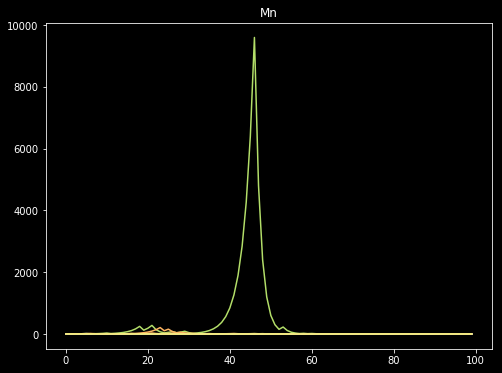

In [14]:
pl.figure(figsize=(8,6))
for i in range(100):
    pl.plot(martingal(100))
pl.title("Mn")

## Exercício 4

In [15]:
from exercicio4 import entre_chegadas, teorema448, estima_integral

A integral estimada é 57.07827580528802


In [16]:
lamb, T, J = 1, 5, 15

In [17]:
def plot_func_e_estima(lamb, T, J, func):
    guarda_temposMudanca = []
    for k in range(J):
        x = func(lamb,T)
        guarda_temposMudanca.append(x[:])
        y = [i for i in range(len(x))]
        x.append(T)
        y.append(y[-1])
        pl.step(x,y,where="post")
    ##estima integral
    numerador = sum(estima_integral(tempoMudanca,T) for tempoMudanca in guarda_temposMudanca)
    estimado = numerador / J
    print("A integral estimada é " + str(estimado))

In [18]:
plot_func_e_estima(lamb,T,J,entre_chegadas)

A integral estimada é 27.159293225764507


In [19]:
plot_func(lamb,T,J,teorema448)

NameError: name 'plot_func' is not defined

## Exercício 5

In [0]:
from exercicio5 import exercicio5

In [0]:
n, m = 5, 50

In [0]:
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(X)+np.random.normal(loc = 0, scale = 0.001, size = n)
Xn = np.linspace(-np.pi, np.pi, m)

In [0]:
mu, cov = exercicio5(X, Xn, Y, 0.01);

In [0]:
stdv = np.sqrt(np.diag(cov))

In [0]:
pl.figure(figsize=(8,6))
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, np.sin(Xn), label="Função exata")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Média estimada")
pl.axis([-np.pi, np.pi, -3, 3])
pl.title('Aproximando a função seno')
pl.legend()
pl.show()

## Exercício 6

In [0]:
from exercicio6 import exercicio6

In [0]:
J = 1000
M = []
for j in range(J):
    M.append(exercicio6(5)[1])
pl.figure(figsize=(8,6))
pl.hist(M)
pl.title("Histograma de M1")

## Exercício 7

In [0]:
from exercicio7 import precifica_call

In [0]:
K = [80+5*i for i in range(9)]
C = []
for k in K:
    C.append(precifica_call(100, 0.05, 0.4, 1, k, 1000))

In [0]:
pl.figure(figsize=(8,6))
pl.plot(C)
pl.xticks([i for i in range(9)], K);
pl.title("C(K)");